## Travail sur Covid-19

Chargement de l'url en question

In [1]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_file = pd.read_csv(data_url)

In [4]:
print(data_file)

                       Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12          

Maintenant que cela est fait, nous pouvons évaluer le fichier en récupérant d'abord les jours recensés que nous allons utilisé comme index:

In [16]:
time_index = data_file.columns[4:]
print(time_index)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [6]:
print(data_file['Country/Region'])

0                 Afghanistan
1                     Albania
2                     Algeria
3                     Andorra
4                      Angola
5         Antigua and Barbuda
6                   Argentina
7                     Armenia
8                   Australia
9                   Australia
10                  Australia
11                  Australia
12                  Australia
13                  Australia
14                  Australia
15                  Australia
16                    Austria
17                 Azerbaijan
18                    Bahamas
19                    Bahrain
20                 Bangladesh
21                   Barbados
22                    Belarus
23                    Belgium
24                      Benin
25                     Bhutan
26                    Bolivia
27     Bosnia and Herzegovina
28                     Brazil
29                     Brunei
                ...          
234                Mozambique
235                     Syria
236       

In [7]:
import math

to_study_country = {}
to_study_country['Belgium'] = ()
to_study_country['China'] = ()
to_study_country['Hong Kong'] = ()
to_study_country['France'] = ()
to_study_country['Germany'] = ()
to_study_country['Iran'] = ()
to_study_country['Italy'] = ()
to_study_country['Japan'] = ()
to_study_country['Korea, South'] = ()
to_study_country['Netherlands'] = ()
to_study_country['Portugal'] = ()
to_study_country['Spain'] = ()
to_study_country['United Kingdom'] = ()
to_study_country['US'] = ()
for i, country in enumerate(data_file['Country/Region']):
    if country == 'Belgium':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'China':
        if data_file['Province/State'][i] == 'Hong Kong':
            to_study_country['Hong Kong'] = to_study_country['Hong Kong'] + (i,)
        else:
            to_study_country[country] = to_study_country[country] + (i,)
    if country == 'France':
        if isinstance(data_file['Province/State'][i], str):
            pass
        else:
            to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Germany':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Iran':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Italy':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Japan':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Korea, South':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Netherlands':
        if isinstance(data_file['Province/State'][i], str):
            pass
        else:
            to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Portugal':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'Spain':
        to_study_country[country] = to_study_country[country] + (i,)
    if country == 'United Kingdom':
        if isinstance(data_file['Province/State'][i], str):
            pass
        else:            
            to_study_country[country] = to_study_country[country] + (i,)
    if country == 'US':
        to_study_country[country] = to_study_country[country] + (i,)
        
print(to_study_country)

{'Belgium': (23,), 'China': (49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81), 'Hong Kong': (61,), 'France': (116,), 'Germany': (120,), 'Iran': (133,), 'Italy': (137,), 'Japan': (139,), 'Korea, South': (143,), 'Netherlands': (169,), 'Portugal': (184,), 'Spain': (201,), 'United Kingdom': (223,), 'US': (225,)}


Maintenant que nous avons récupérer les indices de chaques lignes nous pouvons commencer à créer le dictionnaire qui servira de données au fichier pandas

In [8]:
to_study_country['Belgium'] = data_file.iloc[to_study_country['Belgium'][0], 4:]
to_study_country['Hong Kong'] = data_file.iloc[to_study_country['Hong Kong'][0], 4:]
to_study_country['France'] = data_file.iloc[to_study_country['France'][0], 4:]
to_study_country['Germany'] = data_file.iloc[to_study_country['Germany'][0], 4:]
to_study_country['Iran'] = data_file.iloc[to_study_country['Iran'][0], 4:]
to_study_country['Italy'] = data_file.iloc[to_study_country['Italy'][0], 4:]
to_study_country['Japan'] = data_file.iloc[to_study_country['Japan'][0], 4:]
to_study_country['Korea, South'] = data_file.iloc[to_study_country['Korea, South'][0], 4:]
to_study_country['Netherlands'] = data_file.iloc[to_study_country['Netherlands'][0], 4:]
to_study_country['Portugal'] = data_file.iloc[to_study_country['Portugal'][0], 4:]
to_study_country['Spain'] = data_file.iloc[to_study_country['Spain'][0], 4:]
to_study_country['United Kingdom'] = data_file.iloc[to_study_country['United Kingdom'][0], 4:]
to_study_country['US'] = data_file.iloc[to_study_country['US'][0], 4:]
China_overall = data_file.iloc[to_study_country['China'][0], 4:]
for i, j in enumerate(to_study_country['China']):
    if i > 0:
        China_overall += data_file.iloc[j, 4:]
to_study_country['China'] = China_overall


In [9]:
study_data = pd.DataFrame(index = time_index, data = to_study_country)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

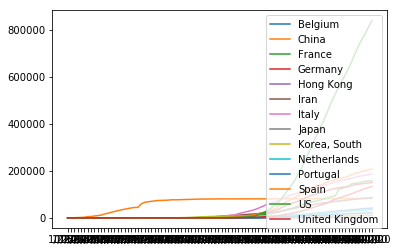

In [18]:
axes = study_data.plot(x = time_index).axes
axes.xaxis.set_ticks(range(len(time_index)))
axes.xaxis.set_ticklabels(time_index)
print(time_index)

          Belgium     China    France   Germany  Hong Kong      Iran  \
1/22/20  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
1/23/20  0.693147  0.693147  0.693147  0.693147   0.693147  0.693147   
1/24/20  1.098612  1.098612  1.098612  1.098612   1.098612  1.098612   
1/25/20  1.386294  1.386294  1.386294  1.386294   1.386294  1.386294   
1/26/20  1.609438  1.609438  1.609438  1.609438   1.609438  1.609438   
1/27/20  1.791759  1.791759  1.791759  1.791759   1.791759  1.791759   
1/28/20  1.945910  1.945910  1.945910  1.945910   1.945910  1.945910   
1/29/20  2.079442  2.079442  2.079442  2.079442   2.079442  2.079442   
1/30/20  2.197225  2.197225  2.197225  2.197225   2.197225  2.197225   
1/31/20  2.302585  2.302585  2.302585  2.302585   2.302585  2.302585   
2/1/20   2.397895  2.397895  2.397895  2.397895   2.397895  2.397895   
2/2/20   2.484907  2.484907  2.484907  2.484907   2.484907  2.484907   
2/3/20   2.564949  2.564949  2.564949  2.564949   2.564949  2.56

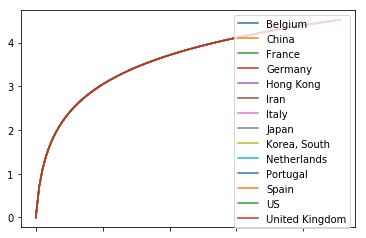

In [12]:
log_study_data = {}
for country in study_data.columns:
    list_for_country = list()
    for i in range(len(study_data[country])):
        list_for_country.append(math.log(i+1))
    log_study_data[country] = list_for_country

log_study_data_df = pd.DataFrame(index = time_index, data = log_study_data)
print(log_study_data_df)
log_study_data_df.plot(x = time_index)